In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/energy-demand-forecast/preprocessed_power_consumption.csv
/kaggle/input/energy-demand-forecast/featured_power_consumption.csv


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv('/kaggle/input/energy-demand-forecast/featured_power_consumption.csv')
df.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_active_power_trend,Global_active_power_seasonal,...,Global_active_power_24h_mean,Global_active_power_24h_std,Global_reactive_power_24h_mean,Global_reactive_power_24h_std,Global_active_power_trend_24h_mean,Global_active_power_trend_24h_std,Global_active_power_seasonal_24h_mean,Global_active_power_seasonal_24h_std,Global_active_power_residual_24h_mean,Global_active_power_residual_24h_std
0,2007-01-01 00:23:00,2.650,0.218,241.67,11.0,0,2.0,0.0,2.576708,0.004461,...,2.516417,0.047629,0.053167,0.063670,2.514110,0.036148,-7.228014e-20,0.002673,0.002306,0.062381
1,2007-01-01 00:24:00,2.682,0.258,242.45,11.0,0,1.0,0.0,2.582500,-0.000390,...,2.520667,0.057149,0.058250,0.074517,2.519409,0.036476,-7.228014e-20,0.002673,0.001258,0.060408
2,2007-01-01 00:25:00,2.660,0.252,241.60,11.0,0,1.0,0.0,2.587708,0.000785,...,2.525167,0.063610,0.064583,0.084067,2.524711,0.036783,-7.228014e-20,0.002673,0.000456,0.059286
3,2007-01-01 00:26:00,2.650,0.250,241.14,11.0,0,2.0,0.0,2.591667,0.004544,...,2.529333,0.068402,0.070833,0.092015,2.529963,0.036977,-7.228014e-20,0.002673,-0.000630,0.057994
4,2007-01-01 00:27:00,2.654,0.250,241.38,11.0,0,1.0,0.0,2.595833,-0.000754,...,2.533667,0.072914,0.077083,0.098918,2.535174,0.037083,-7.228014e-20,0.002673,-0.001508,0.056869


In [23]:
print("Start Datetime:", df.Datetime.min())
print("End Datetime:",df.Datetime.max())

Start Datetime: 2007-01-01 00:23:00
End Datetime: 2007-06-30 23:48:00


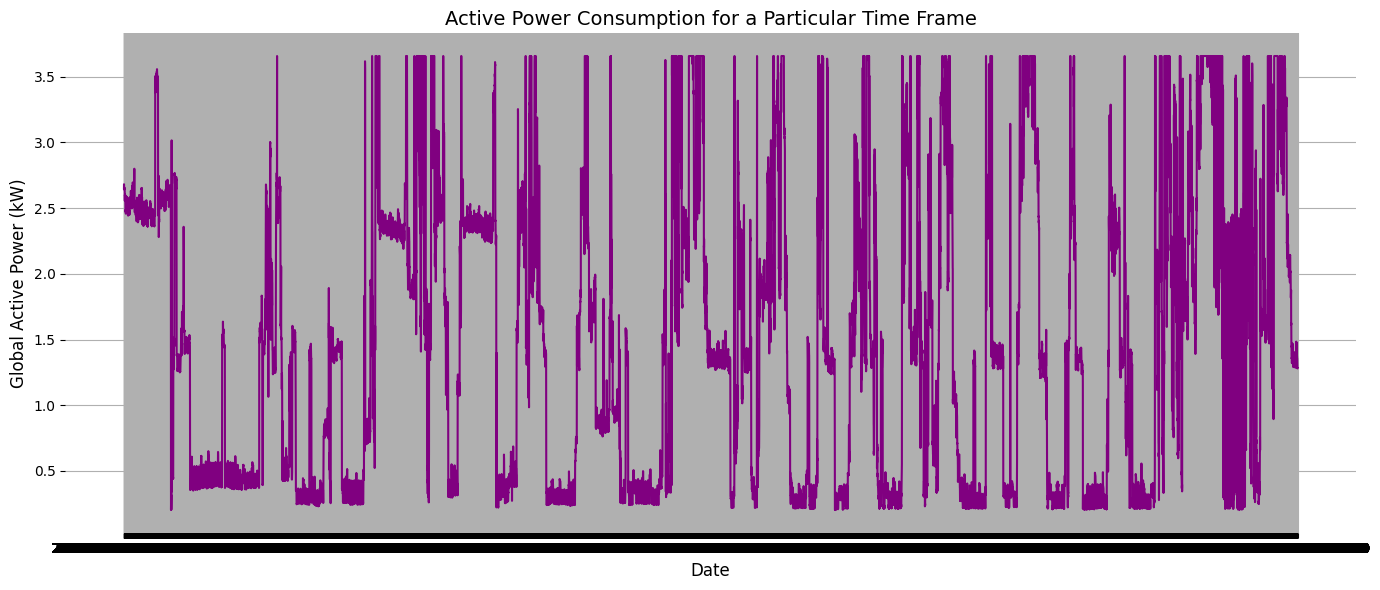

In [24]:
data1 = df[(df.Datetime >= '2007-01-01') & (df.Datetime < '2007-01-15')]

plt.figure(figsize=(14,6))
plt.plot(data1.Datetime, data1.Global_active_power, color='purple')
plt.ylabel('Global Active Power (kW)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Active Power Consumption for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
sns.despine(bottom=True, left=True)
plt.show()

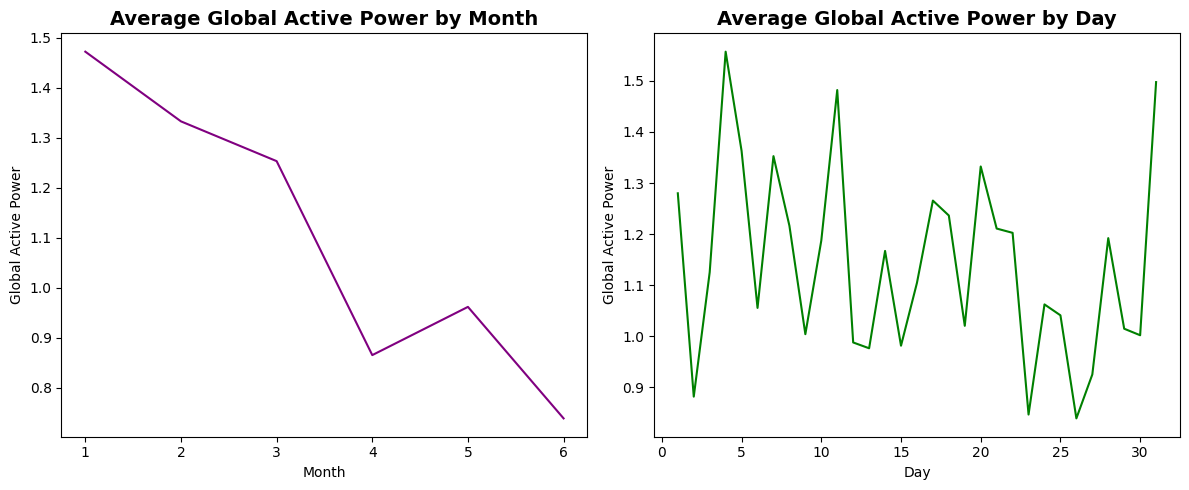

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'day' column is in datetime format, derive 'month'
df['month'] = pd.to_datetime(df['Datetime']).dt.month

# Create a figure with 1 row and 2 columns and set its size
plt.figure(figsize=(12, 5))

# Average Global Active Power by Month
plt.subplot(1, 2, 1)
grouped_by_month = df.groupby('month').Global_active_power.mean()
grouped_by_month.plot(color='purple')
plt.title('Average Global Active Power by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Global Active Power')

# Average Global Active Power by Day
plt.subplot(1, 2, 2)
grouped_by_day = df.groupby('day').Global_active_power.mean()
grouped_by_day.plot(color='green')
plt.title('Average Global Active Power by Day', fontsize=14, fontweight='bold')
plt.xlabel('Day')
plt.ylabel('Global Active Power')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


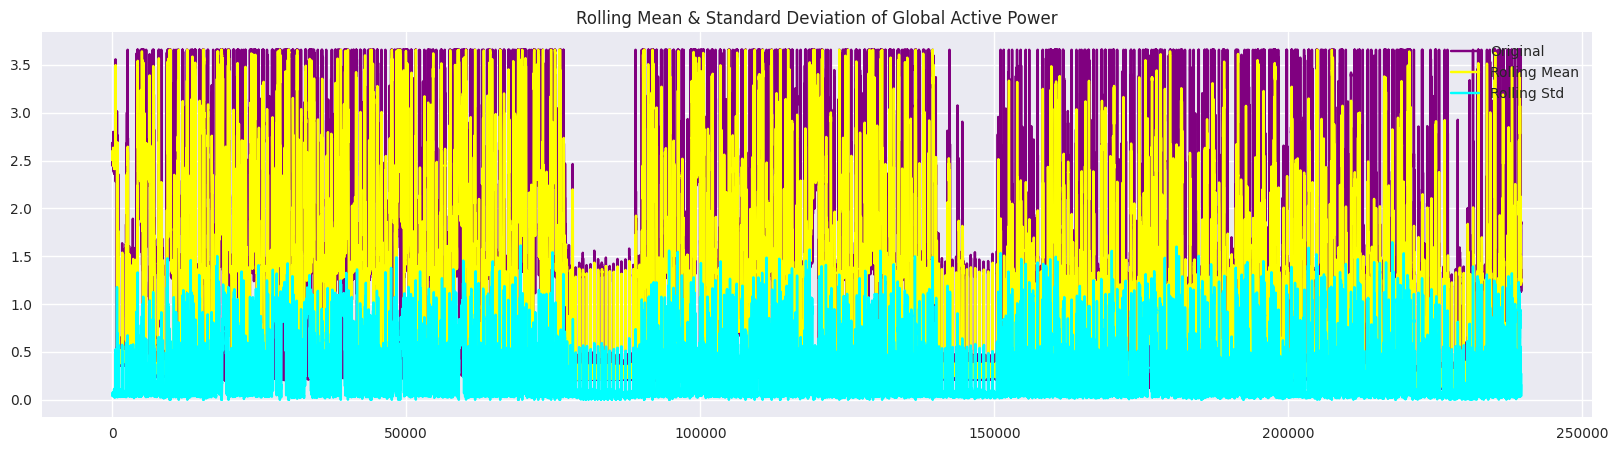

<Results of Dickey-Fuller Test>
Test Statistic                    -24.495991
p-value                             0.000000
#Lags Used                         84.000000
Number of Observations Used    239510.000000
Critical Value (1%)                -3.430377
Critical Value (5%)                -2.861552
Critical Value (10%)               -2.566776
dtype: float64


In [38]:
def test_stationarity(timeseries):
    # Calculate rolling mean and standard deviation
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    # Plot original timeseries, rolling mean, and rolling standard deviation
    plt.figure(figsize=(20,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='purple',label='Original')
    mean = plt.plot(rolmean, color='yellow', label='Rolling Mean')
    std = plt.plot(rolstd, color='cyan', label = 'Rolling Std')

    # Add legend
    plt.legend(loc='best')
    # Add title
    plt.title('Rolling Mean & Standard Deviation of Global Active Power')
    plt.show()

    # Perform and display results of Dickey-Fuller test
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                     index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(df.Global_active_power.dropna())

/tmp/ipykernel_88/1006683267.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


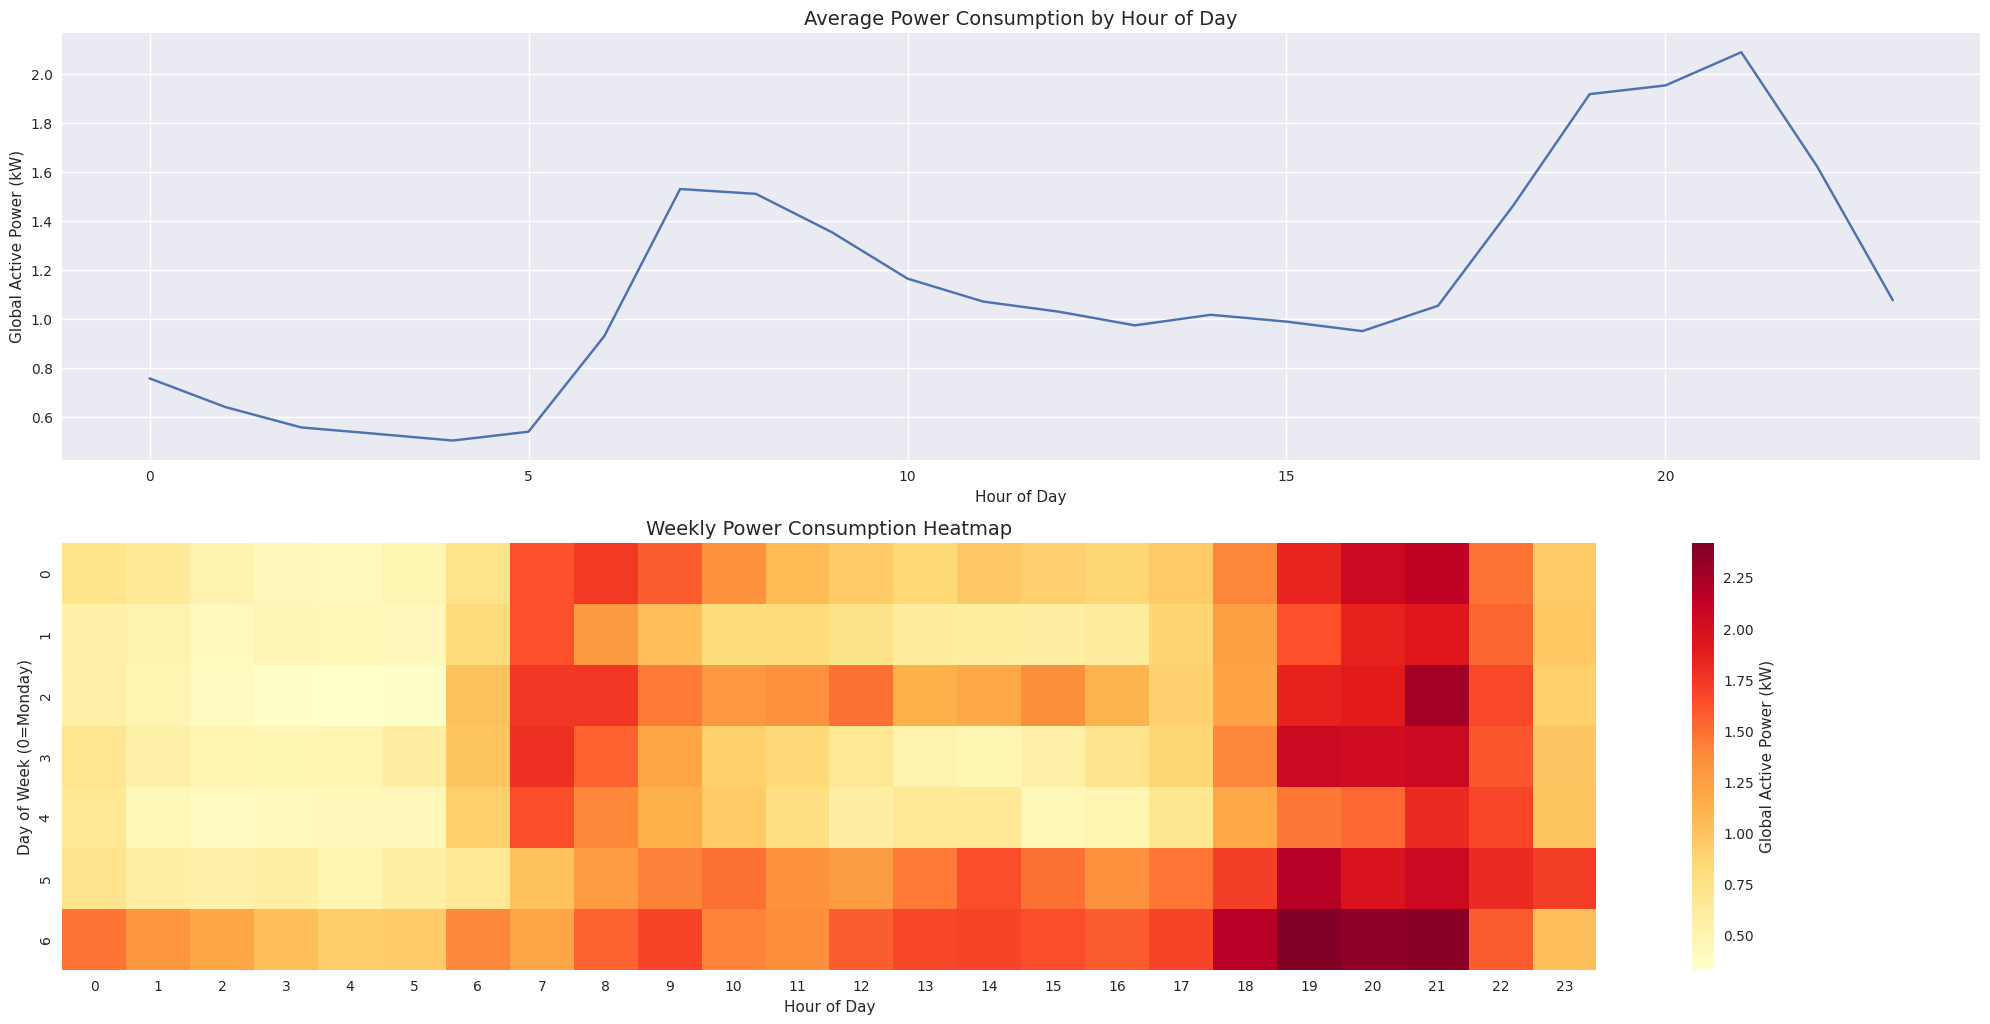

In [36]:
def create_energy_visualizations(df):
    # Set the style for better-looking graphs
    plt.style.use('seaborn')
    
    # Create a figure with 3 subplots
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Daily Power Consumption Pattern by Hour
    plt.subplot(3, 1, 1)
    daily_hourly = df.groupby('hour')['Global_active_power'].mean()
    sns.lineplot(x=daily_hourly.index, y=daily_hourly.values)
    plt.title('Average Power Consumption by Hour of Day', fontsize=14)
    plt.xlabel('Hour of Day')
    plt.ylabel('Global Active Power (kW)')
    plt.grid(True)
    
    # 2. Weekly Pattern with Weekend Highlight
    plt.subplot(3, 1, 2)
    weekly_pattern = df.groupby(['day_of_week', 'hour'])['Global_active_power'].mean().unstack()
    sns.heatmap(weekly_pattern, 
                cmap='YlOrRd',
                cbar_kws={'label': 'Global Active Power (kW)'},
                xticklabels=range(24))
    plt.title('Weekly Power Consumption Heatmap', fontsize=14)
    plt.xlabel('Hour of Day')
    plt.ylabel('Day of Week (0=Monday)')
    
    # Adjust layout and display
    plt.tight_layout()
    return fig

fig = create_energy_visualizations(df)
plt.show()

In [28]:
# Additional function for correlation heatmap
def create_correlation_heatmap(df):
    # Select relevant numerical columns for correlation
    power_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                  'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 
                  'Sub_metering_3', 'power_factor', 'total_submetering']
    
    # Create correlation matrix
    corr_matrix = df[power_cols].corr()
    
    # Create heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, 
                annot=True, 
                cmap='coolwarm', 
                center=0,
                fmt='.2f',
                square=True)
    plt.title('Correlation Heatmap of Power Metrics', fontsize=14)
    plt.tight_layout()
    return plt.gcf()

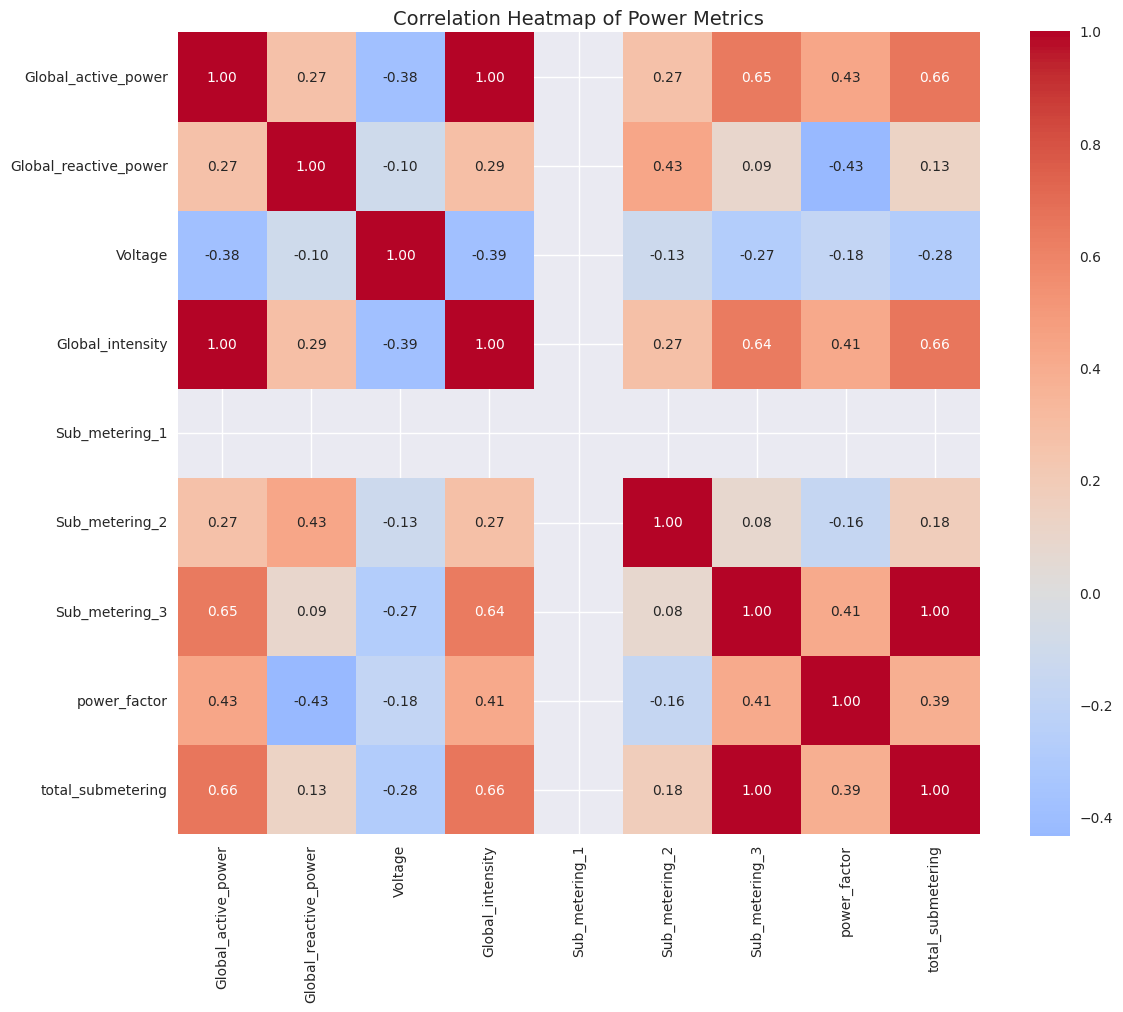

In [29]:
fig = create_correlation_heatmap(df)
plt.show()


In [30]:
def plot_time_series_components(df, sample_days=7):
    # Convert to datetime if not already
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    
    # Sample a few days of data for better visualization
    sample_data = df.set_index('Datetime').iloc[:sample_days*24]
    
    # Create the plot
    fig, axes = plt.subplots(5, 1, figsize=(15, 20))
    
    # Original Data
    axes[0].plot(sample_data.index, sample_data['Global_active_power'], label='Original')
    axes[0].set_title('Original Time Series')
    axes[0].set_ylabel('Global Active Power')
    axes[0].legend()
    axes[0].grid(True)
    
    # Trend
    axes[1].plot(sample_data.index, sample_data['Global_active_power_trend'], label='Trend', color='green')
    axes[1].set_title('Trend Component')
    axes[1].set_ylabel('Trend Value')
    axes[1].legend()
    axes[1].grid(True)
    
    # Seasonal
    axes[2].plot(sample_data.index, sample_data['Global_active_power_seasonal'], label='Seasonal', color='red')
    axes[2].set_title('Seasonal Component')
    axes[2].set_ylabel('Seasonal Value')
    axes[2].legend()
    axes[2].grid(True)
    
    # Residual
    axes[3].plot(sample_data.index, sample_data['Global_active_power_residual'], label='Residual', color='purple')
    axes[3].set_title('Residual Component')
    axes[3].set_ylabel('Residual Value')
    axes[3].legend()
    axes[3].grid(True)
    
    # Moving Average and Smoothing
    axes[4].plot(sample_data.index, sample_data['Global_active_power'], label='Original', alpha=0.5)
    axes[4].plot(sample_data.index, sample_data['Global_active_power_smoothed_ma'], 
                 label='Moving Average', color='orange')
    axes[4].plot(sample_data.index, sample_data['Global_active_power_smoothed_sg'], 
                 label='Savitzky-Golay', color='red')
    axes[4].set_title('Smoothing Comparison')
    axes[4].set_ylabel('Power Value')
    axes[4].legend()
    axes[4].grid(True)
    
    plt.tight_layout()
    return fig

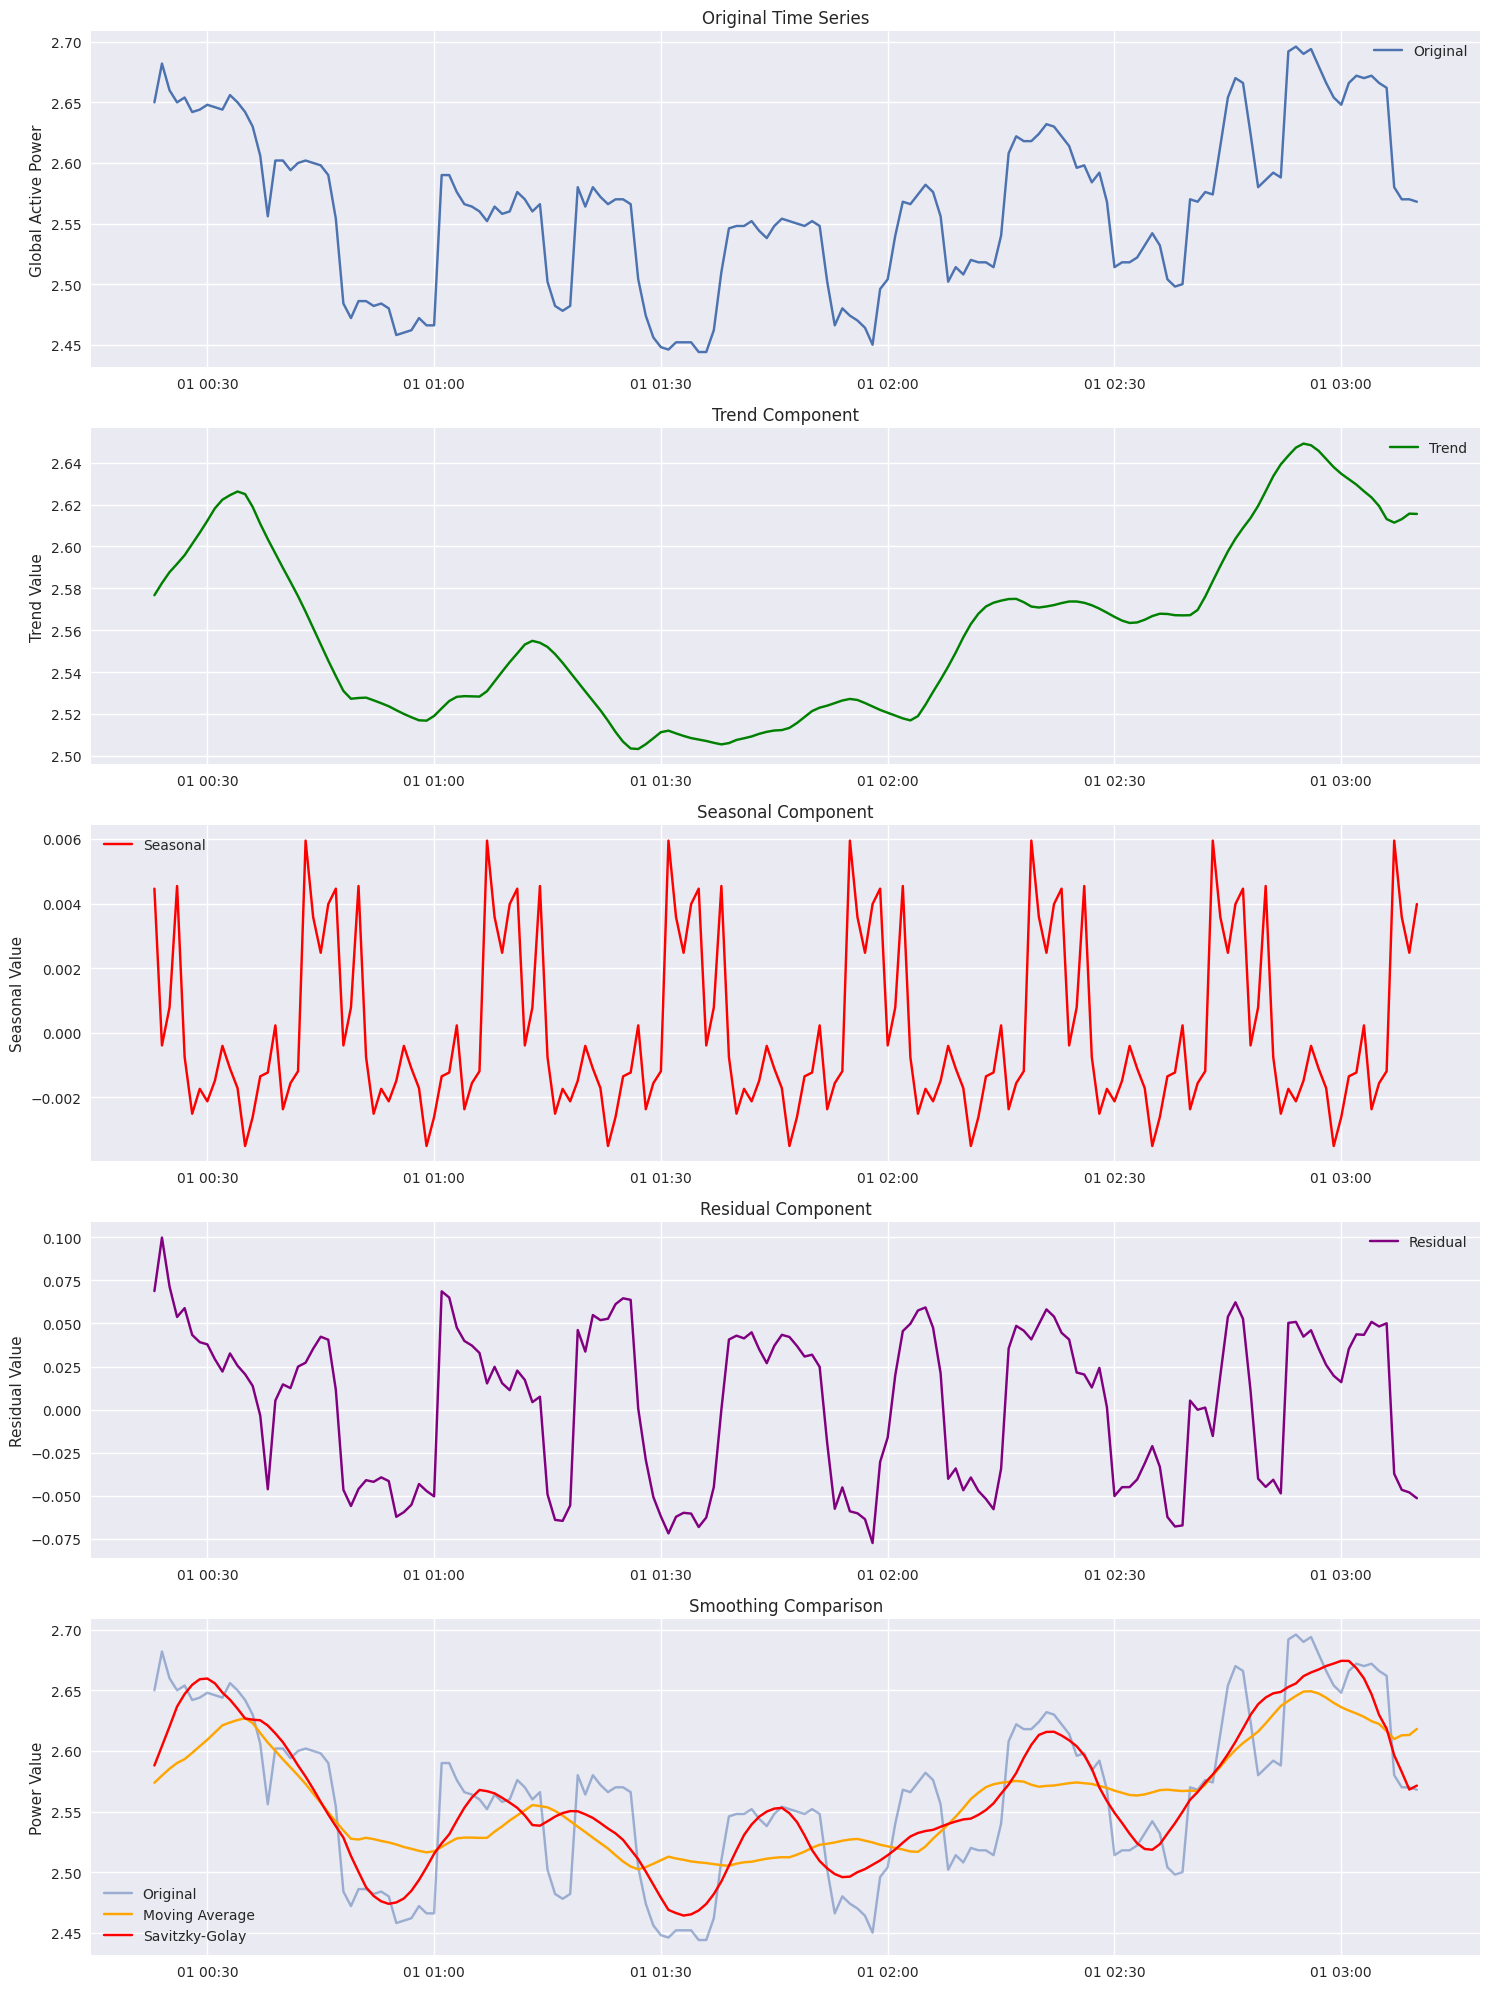

In [31]:
time_series_fig = plot_time_series_components(df)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


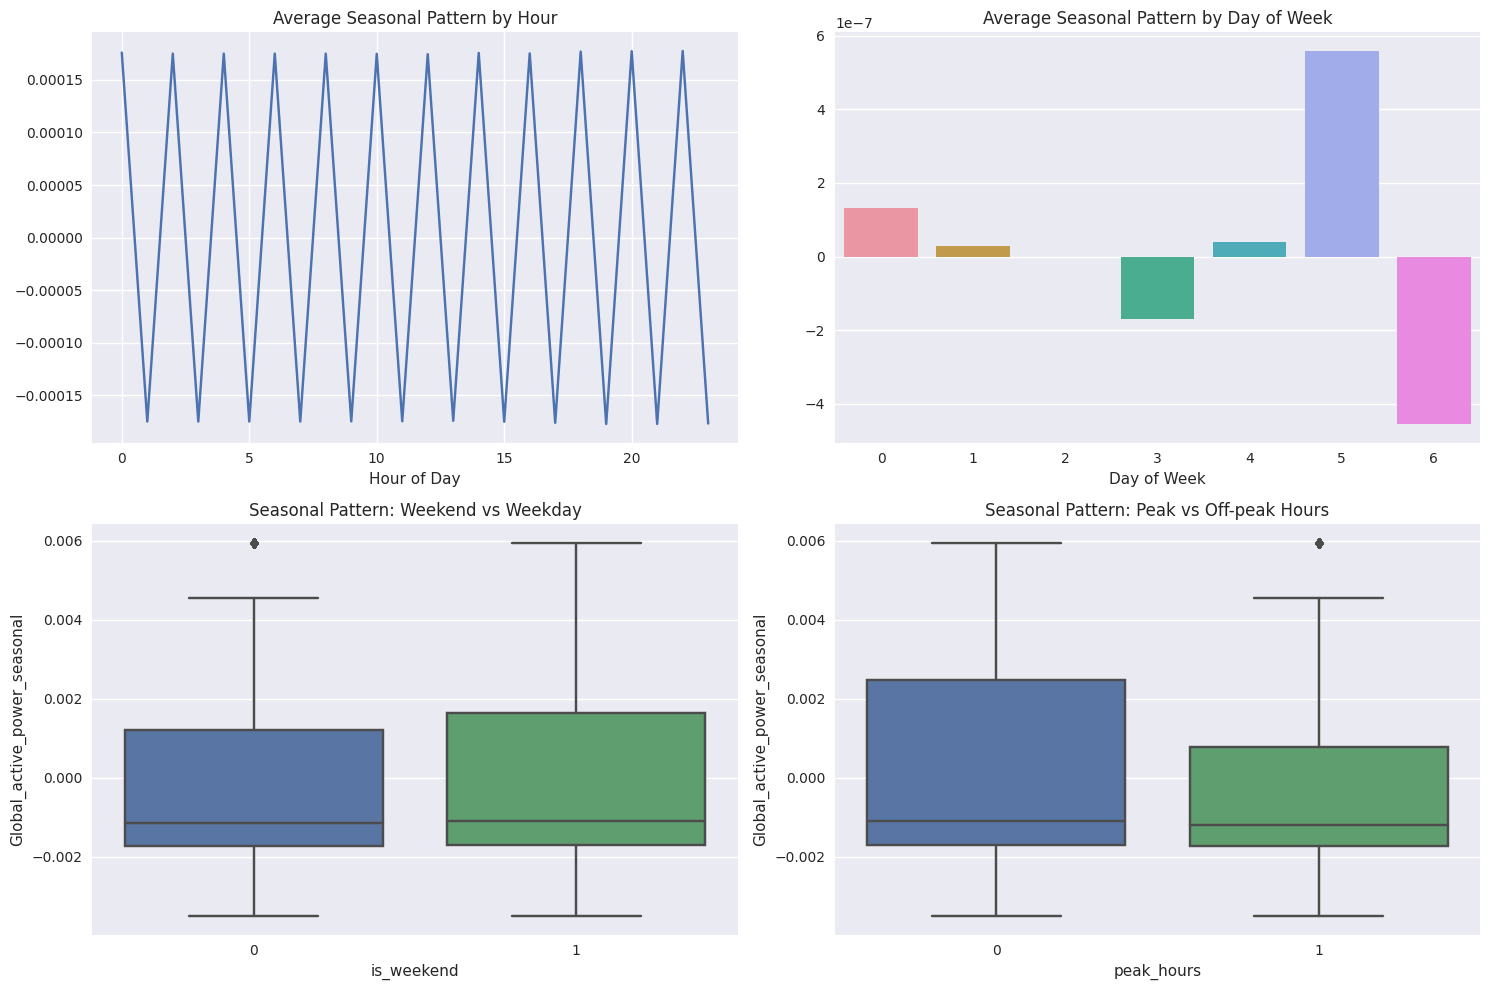

In [32]:
def analyze_seasonal_patterns(df):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Hourly pattern
    hourly_pattern = df.groupby('hour')['Global_active_power_seasonal'].mean()
    sns.lineplot(x=hourly_pattern.index, y=hourly_pattern.values, ax=axes[0,0])
    axes[0,0].set_title('Average Seasonal Pattern by Hour')
    axes[0,0].set_xlabel('Hour of Day')
    
    # Daily pattern
    daily_pattern = df.groupby('day_of_week')['Global_active_power_seasonal'].mean()
    sns.barplot(x=daily_pattern.index, y=daily_pattern.values, ax=axes[0,1])
    axes[0,1].set_title('Average Seasonal Pattern by Day of Week')
    axes[0,1].set_xlabel('Day of Week')
    
    # Weekend vs Weekday
    sns.boxplot(x='is_weekend', y='Global_active_power_seasonal', data=df, ax=axes[1,0])
    axes[1,0].set_title('Seasonal Pattern: Weekend vs Weekday')
    
    # Peak vs Off-peak
    sns.boxplot(x='peak_hours', y='Global_active_power_seasonal', data=df, ax=axes[1,1])
    axes[1,1].set_title('Seasonal Pattern: Peak vs Off-peak Hours')
    
    plt.tight_layout()
    return fig


seasonal_fig = analyze_seasonal_patterns(df)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

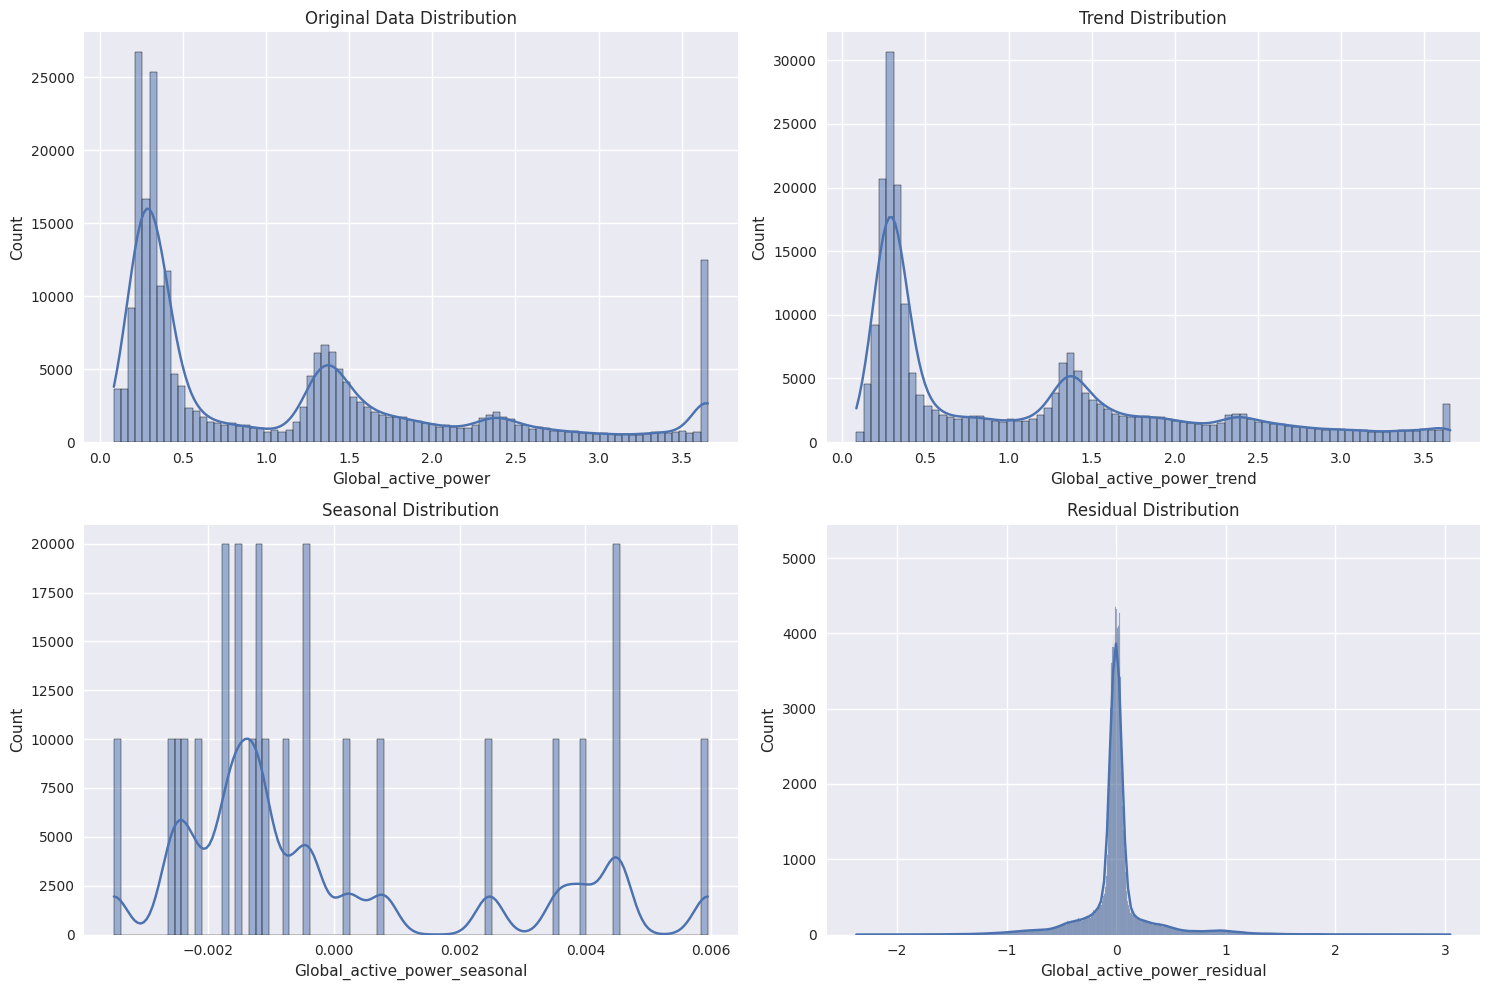

In [33]:
def analyze_decomposition_stats(df):
    stats_df = pd.DataFrame({
        'Original': df['Global_active_power'].describe(),
        'Trend': df['Global_active_power_trend'].describe(),
        'Seasonal': df['Global_active_power_seasonal'].describe(),
        'Residual': df['Global_active_power_residual'].describe()
    })
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    sns.histplot(df['Global_active_power'], kde=True, ax=axes[0,0])
    axes[0,0].set_title('Original Data Distribution')
    
    sns.histplot(df['Global_active_power_trend'], kde=True, ax=axes[0,1])
    axes[0,1].set_title('Trend Distribution')
    
    sns.histplot(df['Global_active_power_seasonal'], kde=True, ax=axes[1,0])
    axes[1,0].set_title('Seasonal Distribution')
    
    sns.histplot(df['Global_active_power_residual'], kde=True, ax=axes[1,1])
    axes[1,1].set_title('Residual Distribution')
    
    plt.tight_layout()
    
    return stats_df, fig
    
stats_df, dist_fig = analyze_decomposition_stats(df)
plt.show()

In [34]:
def calculate_component_metrics(df):
    metrics = {
        'Trend_Strength': df['trend_ratio'].mean(),
        'Seasonal_Strength': df['seasonal_strength'].mean(),
        'Residual_Strength': df['residual_ratio'].mean(),
        'Trend_Volatility': df['Global_active_power_trend'].std(),
        'Seasonal_Volatility': df['Global_active_power_seasonal'].std(),
        'Residual_Volatility': df['Global_active_power_residual'].std()
    }
    
    return pd.Series(metrics)

/tmp/ipykernel_88/1654252275.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


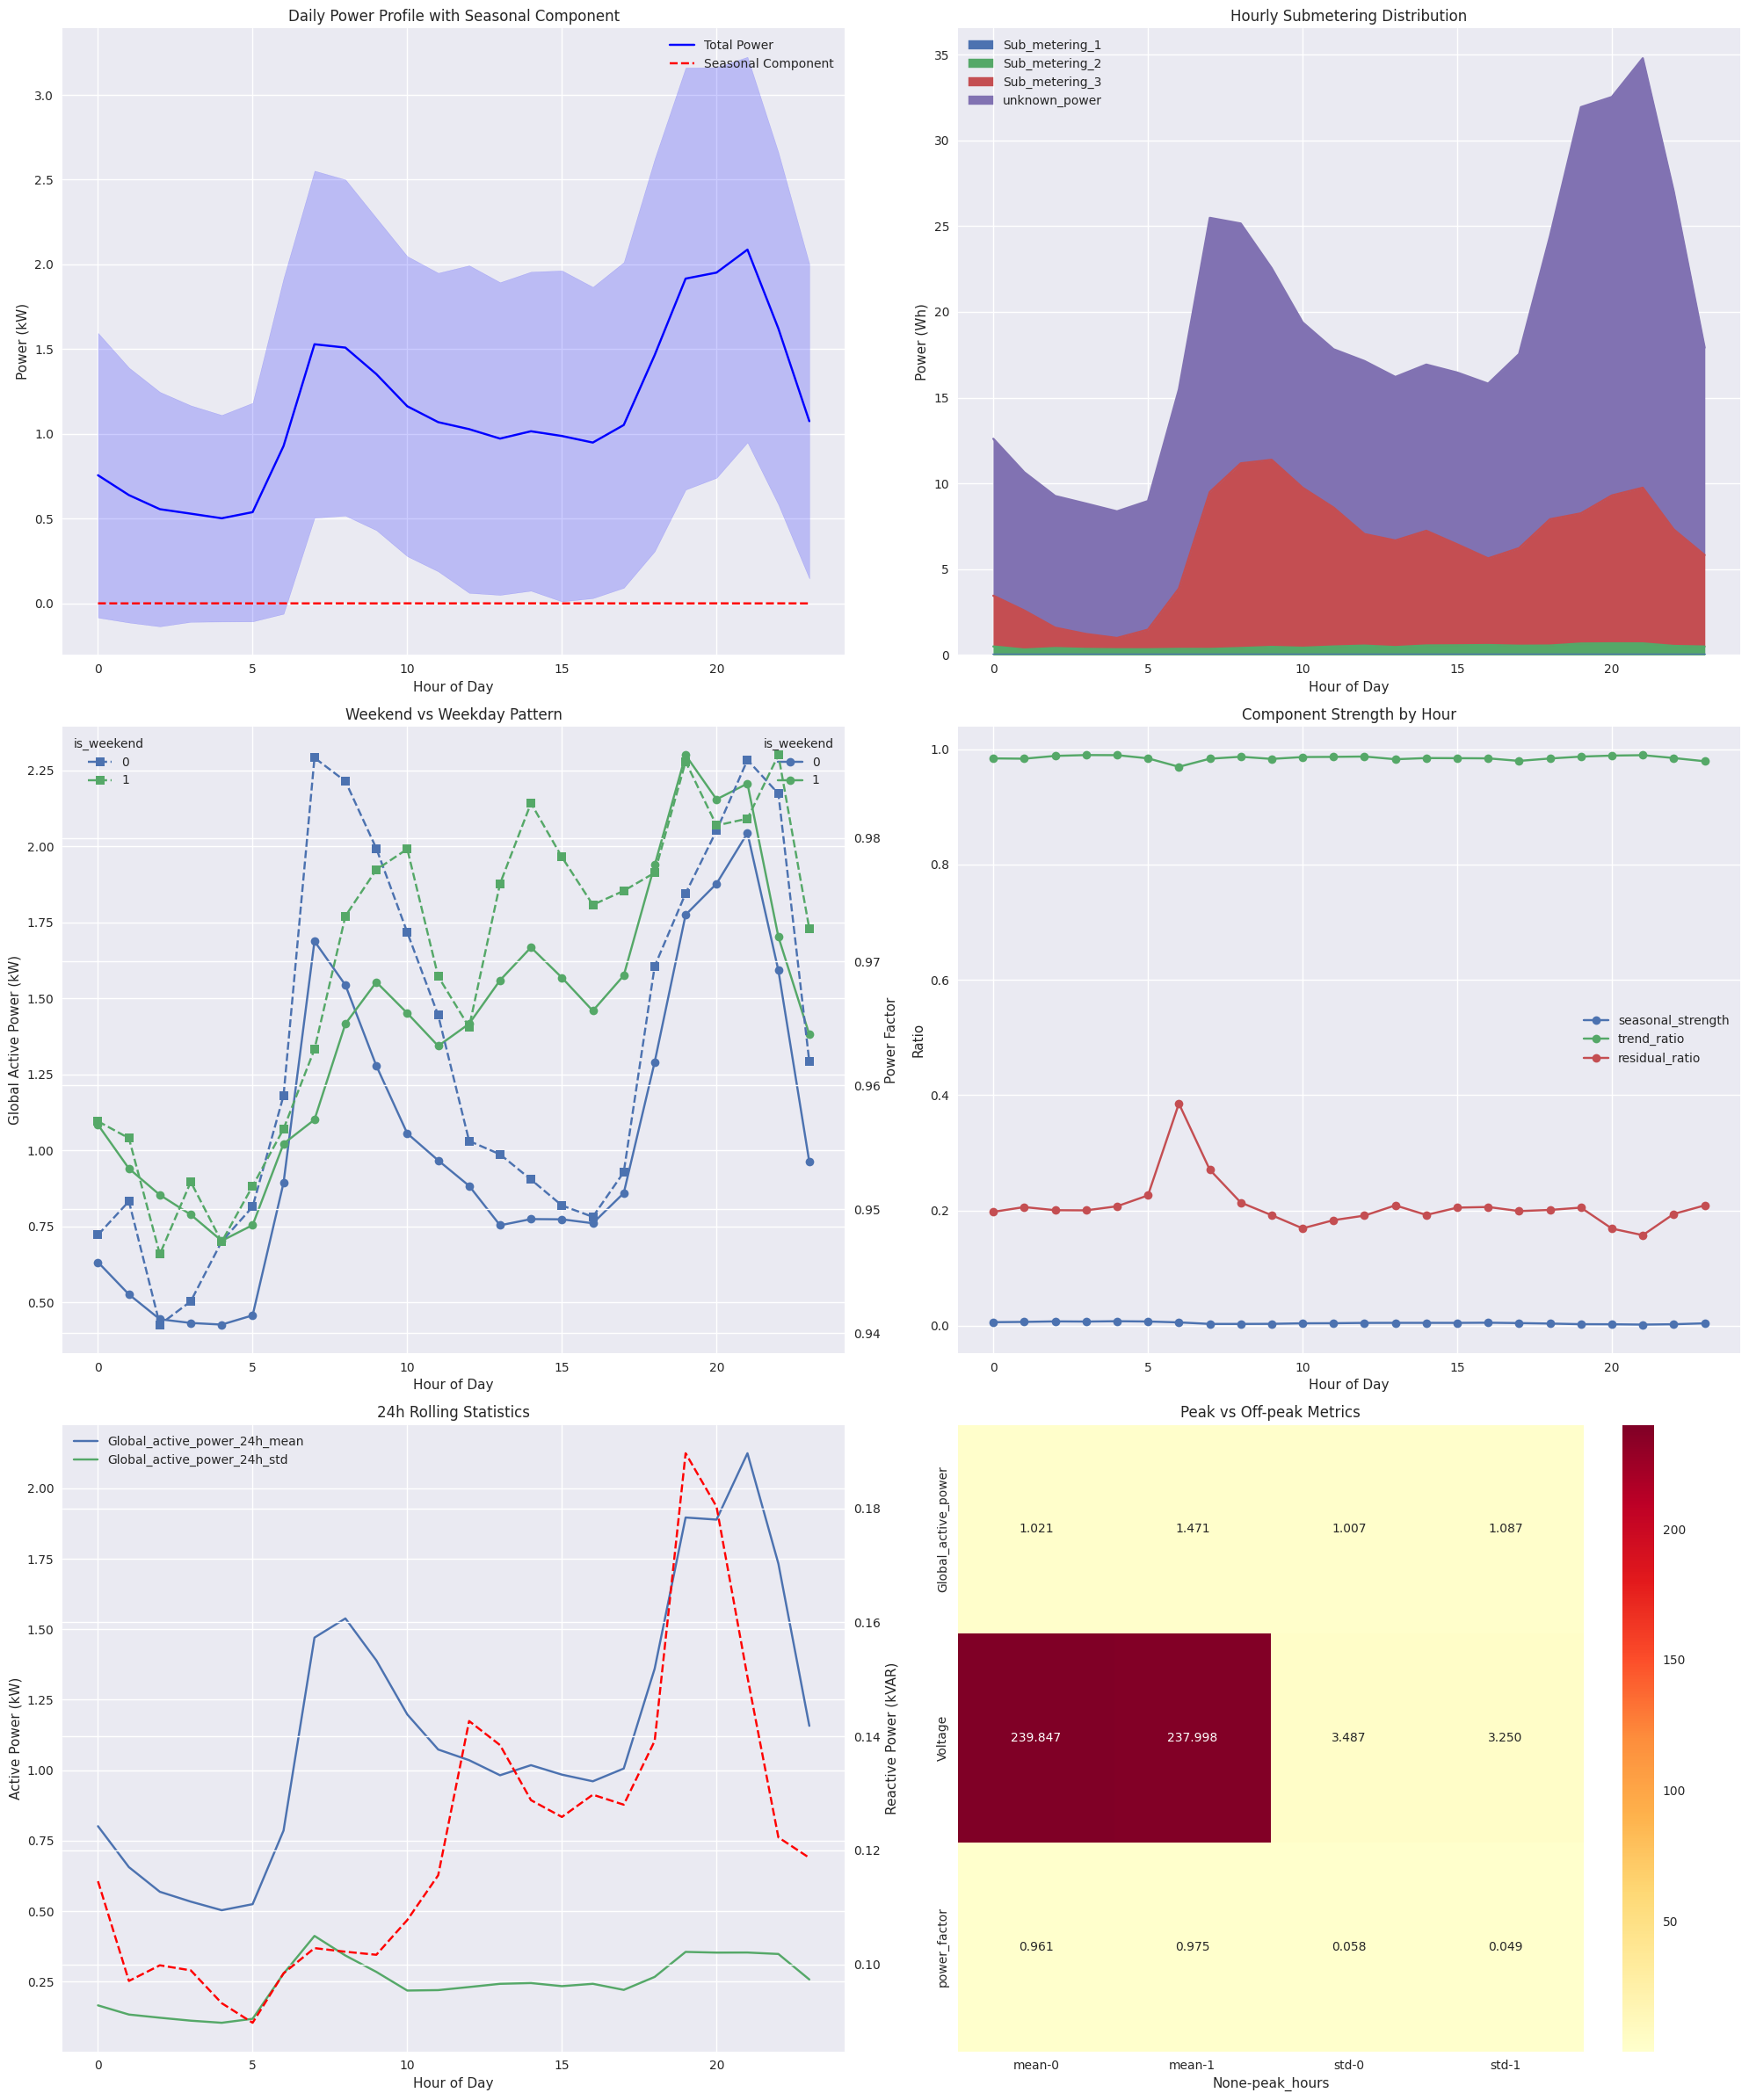

In [35]:
from scipy import stats

def analyze_power_patterns(df):
    """
    Comprehensive analysis of power consumption patterns with multiple components
    """
    fig, axes = plt.subplots(3, 2, figsize=(20, 24))
    plt.style.use('seaborn')
    
    # 1. Daily Power Profile (Top Left)
    hourly_stats = df.groupby('hour').agg({
        'Global_active_power_seasonal': ['mean', 'std'],
        'Global_active_power': ['mean', 'std']
    })
    
    axes[0,0].plot(hourly_stats.index, 
                   hourly_stats[('Global_active_power', 'mean')],
                   label='Total Power', 
                   color='blue')
    axes[0,0].fill_between(hourly_stats.index,
                          hourly_stats[('Global_active_power', 'mean')] - hourly_stats[('Global_active_power', 'std')],
                          hourly_stats[('Global_active_power', 'mean')] + hourly_stats[('Global_active_power', 'std')],
                          alpha=0.2,
                          color='blue')
    
    axes[0,0].plot(hourly_stats.index, 
                   hourly_stats[('Global_active_power_seasonal', 'mean')],
                   label='Seasonal Component',
                   color='red',
                   linestyle='--')
    
    axes[0,0].set_title('Daily Power Profile with Seasonal Component')
    axes[0,0].set_xlabel('Hour of Day')
    axes[0,0].set_ylabel('Power (kW)')
    axes[0,0].legend()
    
    # 2. Submetering Analysis (Top Right)
    submetering_hourly = df.groupby('hour').agg({
        'Sub_metering_1': 'mean',
        'Sub_metering_2': 'mean',
        'Sub_metering_3': 'mean',
        'unknown_power': 'mean'
    })
    
    submetering_hourly.plot(kind='area', stacked=True, ax=axes[0,1])
    axes[0,1].set_title('Hourly Submetering Distribution')
    axes[0,1].set_xlabel('Hour of Day')
    axes[0,1].set_ylabel('Power (Wh)')
    
    # 3. Weekend vs Weekday Pattern (Middle Left)
    weekend_pattern = df.pivot_table(
        values=['Global_active_power', 'power_factor'],
        columns='is_weekend',
        index='hour',
        aggfunc='mean'
    )
    
    ax2 = axes[1,0].twinx()
    weekend_pattern['Global_active_power'].plot(ax=axes[1,0], marker='o')
    weekend_pattern['power_factor'].plot(ax=ax2, linestyle='--', marker='s')
    
    axes[1,0].set_title('Weekend vs Weekday Pattern')
    axes[1,0].set_xlabel('Hour of Day')
    axes[1,0].set_ylabel('Global Active Power (kW)')
    ax2.set_ylabel('Power Factor')
    
    # 4. Seasonal Strength Analysis (Middle Right)
    seasonal_metrics = df.groupby('hour').agg({
        'seasonal_strength': 'mean',
        'trend_ratio': 'mean',
        'residual_ratio': 'mean'
    })
    
    seasonal_metrics.plot(ax=axes[1,1], marker='o')
    axes[1,1].set_title('Component Strength by Hour')
    axes[1,1].set_xlabel('Hour of Day')
    axes[1,1].set_ylabel('Ratio')
    
    # 5. 24h Statistics (Bottom Left)
    stats_24h = df.groupby('hour').agg({
        'Global_active_power_24h_mean': 'mean',
        'Global_active_power_24h_std': 'mean',
        'Global_reactive_power_24h_mean': 'mean'
    })
    
    ax3 = axes[2,0].twinx()
    stats_24h[['Global_active_power_24h_mean', 'Global_active_power_24h_std']].plot(ax=axes[2,0])
    stats_24h['Global_reactive_power_24h_mean'].plot(ax=ax3, color='red', linestyle='--')
    
    axes[2,0].set_title('24h Rolling Statistics')
    axes[2,0].set_xlabel('Hour of Day')
    axes[2,0].set_ylabel('Active Power (kW)')
    ax3.set_ylabel('Reactive Power (kVAR)')
    
    # 6. Peak vs Off-peak Analysis (Bottom Right)
    peak_analysis = df.pivot_table(
        values=['Global_active_power', 'Voltage', 'power_factor'],
        columns='peak_hours',
        aggfunc=['mean', 'std']
    ).round(3)
    
    sns.heatmap(peak_analysis, annot=True, fmt='.3f',cmap='YlOrRd',ax=axes[2,1])
    
    axes[2,1].set_title('Peak vs Off-peak Metrics')
    
    plt.tight_layout()
    return fig

def calculate_power_metrics(df):
    """
    Calculate comprehensive power consumption metrics
    """
    metrics = {
        'peak_consumption_hour': df.groupby('hour')['Global_active_power'].mean().idxmax(),
        'peak_seasonal_hour': df.groupby('hour')['Global_active_power_seasonal'].mean().idxmax(),
        'weekend_consumption_ratio': (
            df[df['is_weekend']]['Global_active_power'].mean() / 
            df[~df['is_weekend']]['Global_active_power'].mean()
        ),
        'peak_hours_consumption_ratio': (
            df[df['peak_hours']]['Global_active_power'].mean() / 
            df[~df['peak_hours']]['Global_active_power'].mean()
        ),
        'average_power_factor': df['power_factor'].mean(),
        'seasonal_strength_mean': df['seasonal_strength'].mean(),
        'unknown_power_percentage': (
            df['unknown_power'].sum() / df['Global_active_power'].sum() * 100
        ),
        'peak_voltage_variation': df.groupby('peak_hours')['Voltage'].std().max(),
        'submeter_utilization': (
            (df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']).sum() /
            df['Global_active_power'].sum() * 100
        )
    }
    return pd.Series(metrics)


fig = analyze_power_patterns(df)
plt.show()